In [2]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim 
from sklearn.preprocessing import StandardScaler, LabelEncoder    
from sklearn.model_selection import train_test_split    
import kaggle
from pathlib import Path
import joblib
from HelperFunction import helperFunctions as hp
from torch.utils.data import DataLoader as dl

In [3]:
basePath = Path.cwd().parent
csvFilePath = basePath / 'dataset' / 'heart.csv'

if not csvFilePath.exists():
    kaggle.api.dataset_download_files("johnsmith88/heart-disease-dataset", path=basePath / 'dataset', unzip=True)
else:
    print(f"Dataset file found: {csvFilePath}")

Dataset file found: c:\MachineLearning\DiseaseAndCancerTrackers\dataset\heart.csv


In [4]:
dataset = pd.read_csv(csvFilePath)
df = pd.DataFrame(dataset)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print("Maximum: ", df[col].max())
    print("Minimum: ", df[col].min())
    print("-" * 50)

age: [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
Maximum:  77
Minimum:  29
--------------------------------------------------
sex: [1 0]
Maximum:  1
Minimum:  0
--------------------------------------------------
cp: [0 1 2 3]
Maximum:  3
Minimum:  0
--------------------------------------------------
trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
Maximum:  200
Minimum:  94
--------------------------------------------------
chol: [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 21

In [6]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
scaler = StandardScaler()
continous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continous_col] = scaler.fit_transform(df[continous_col])
print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0  


In [8]:
label_encoder = LabelEncoder()
oridinal_col = ['restecg', 'slope', 'ca',]
df[oridinal_col] = df[oridinal_col].apply(label_encoder.fit_transform)
print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0  


In [9]:
pd.get_dummies(df, columns=['cp', 'thal'], drop_first=True)
print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0  


In [10]:
label_count = df['target'].value_counts()
label_count

target
1    526
0    499
Name: count, dtype: int64

In [11]:
features = df.drop('target', axis=1).to_numpy()
target = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
scaler_save_path = Path.cwd()/'SavedModels'/'HeartDiseaseScaler.pkl'
scaler_save_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(scaler, scaler_save_path)
print(f"Scaler saved at: {scaler_save_path}")

Scaler saved at: c:\MachineLearning\DiseaseAndCancerTrackers\Models\SavedModels\HeartDiseaseScaler.pkl


In [13]:
class HeartDiseaseClassification(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(HeartDiseaseClassification, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 252),
            nn.ReLU(),
            nn.Linear(252, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)
    
    def predict(self, input_data, return_confidence=False):
        self.eval()
        with torch.no_grad():
            input_tensor = torch.tensor(input_data, dtype=torch.float32)    
            output = self(input_tensor)
            confidence = output.item()
            prediction = 1 if confidence > 0.5 else 0
            if return_confidence:
                return prediction, confidence *100
            return prediction

In [14]:
train_dataloader = dl(list(zip(X_train, y_train)), batch_size=32, shuffle=True)
test_dataloader = dl(list(zip(X_test, y_test)), batch_size=32, shuffle=False)
model = HeartDiseaseClassification(input_dim=13, output_dim=1)

def train():
    loss = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    trained_models, metrics = hp.train_and_evaluate(model,train_dataloader, test_dataloader,loss, optimizer,device, 50)
    model_save_path = Path.cwd()/'SavedModels'/'HeartDiseaseModel.pth'
    torch.save(trained_models.state_dict(), model_save_path)
    print(f"Model saved at: {model_save_path}")



Epoch 10, Train Loss: 0.1326, Train Accuracy: 0.9451, Test Loss: 0.3284, Test Accuracy: 0.8732
Epoch 20, Train Loss: 0.0048, Train Accuracy: 1.0000, Test Loss: 0.0859, Test Accuracy: 0.9854
Epoch 30, Train Loss: 0.0009, Train Accuracy: 1.0000, Test Loss: 0.1070, Test Accuracy: 0.9854
Epoch 40, Train Loss: 0.0004, Train Accuracy: 1.0000, Test Loss: 0.1220, Test Accuracy: 0.9854
Epoch 50, Train Loss: 0.0002, Train Accuracy: 1.0000, Test Loss: 0.1352, Test Accuracy: 0.9854


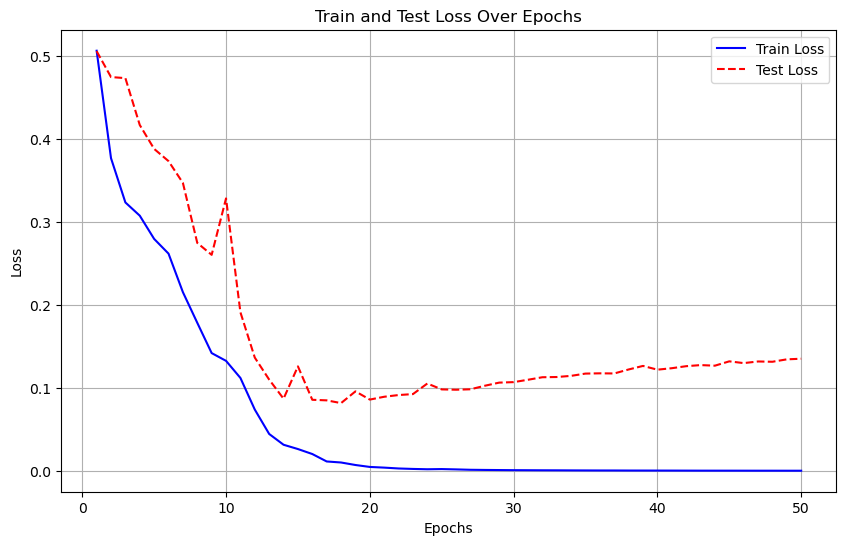

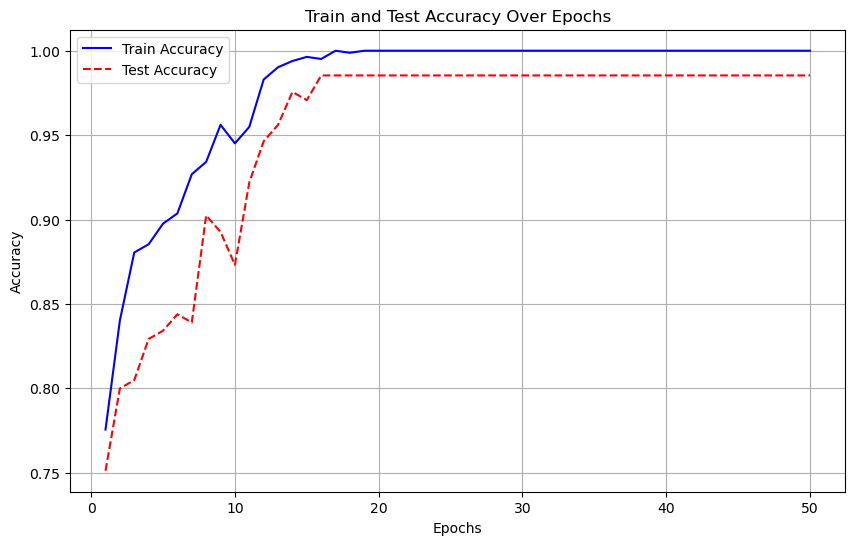

Test Accuracy: 0.9854
Test Precision: 1.0000
Test Recall: 0.9709
Test F1-Score: 0.9852
Test ROC-AUC: 0.9854
Model saved at: c:\MachineLearning\DiseaseAndCancerTrackers\Models\SavedModels\HeartDiseaseModel.pth
Training Completed


In [15]:
if __name__ == "__main__":
    train()
    print("Training Completed")
